## Between-meter associations (unsupervised, distance-based)

We start at:  

1) raking equal metrical forms per each meter (2 by default)  
2) taking random sample of poems per each form (150 by default)  
3) aggregating gamma  
4) calculating distances between samples  
5) hierarchical clustering  
6) check clusterization performance (purity & ARI)  
7) repeat 100 times per metrical forms arrangement, sample metrical forms 20 times  

If ARI shows above random, then some level of "within family" association is happening



Build consensus tree without strict per-family forms limits -> 200 poems as metrical sample and build trees 100 times -> see how trees agree in the end

In [1]:
### load libraries & data
#core
library(topicmodels)
library(tidytext)
library(tidyverse)
library(stringi)
#calculations
library(philentropy)
library(mclust)
library(NMF)
#trees
library(ggtree)
library(ape)
library(phylogram)

#visuals
library(paletteer)
library(hrbrthemes)
library(DT)



source("src/poem_sampler.R")
source("src/test_clusters_families.R") #depends on poem_sampler

load("data/lda_output.rda")

options(repr.plot.width = 8, repr.plot.height = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Package 'mclust' version 5.4.6
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘mclust’


The following object is masked from ‘package:purrr’:

    map


Loading required package: pkgmaker

Loading required package: registry

Loading required package: rngtools

Loading required package: cluster

NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 7/8

  To enable shared memory capabilities, try: install.extras('
NMF
')

Registered S3 method overwritten by 'treeio':
  method     from
  root.phylo ape 

ggtree v2.2.4  For help: https://y

## Controlled clustering clean

Run clusterization checks on equal meter numbers per family (k=5, n=10)

1) Sample 2 meters per family randomly, get a set of equal cases per class  
2) For each set run 100 iterations to sample poems for each meter and measure mean clusterization strength.  
3) Repeat 1-2 for randomly allocated labels / randomly assigned clusters.


In [ ]:
source("src/test_clusters_families.R")
clust_res = test_clusters_families(n_sample_families= 20,# how many times sample meter families
                                  n_families=2,# how many meters in one family to consider
                                  n_meters=2,# how many meters per family to take
                                  iterations=100,# how many times calculate clusters 
                                  min_meter_count=350,# limit for availiable poems per meter
                                  n_poems_per_sample=300,# how many poems in sample
                                  samples=1,
                                  clust_method="complete",
                                  dist="JSD")# number of samples per meter

In [3]:

clust_res = clust_res %>%
    mutate(random = FALSE)
clust_res  %>% summarise(m_ari=median(ari), m_pur=median(purity))

m_ari,m_pur
<dbl>,<dbl>
0.4398931,0.7570833


In [4]:
source("src/test_clusters_families.R")
clust_res_random = test_clusters_families(n_sample_families= 20,
                                  n_families=2,
                                  n_meters=2,
                                  iterations=100,
                                  min_meter_count=350,
                                  n_poems_per_sample=300,
                                  samples=1,
                                  random_clusters=T) # rearrange clusters randomly

[1] "Now at 1 batch"


Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using uni

[1] "Now at 2 batch"


Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using uni

[1] "Now at 3 batch"


Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using uni

[1] "Now at 4 batch"


Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using uni

[1] "Now at 5 batch"


Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using uni

[1] "Now at 6 batch"


Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using uni

[1] "Now at 7 batch"


Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using uni

[1] "Now at 8 batch"


Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using uni

[1] "Now at 9 batch"


Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using uni

[1] "Now at 10 batch"


Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using uni

[1] "Now at 11 batch"


Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using uni

[1] "Now at 12 batch"


Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using uni

[1] "Now at 13 batch"


Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using uni

[1] "Now at 14 batch"


Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using uni

[1] "Now at 15 batch"


Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using uni

[1] "Now at 16 batch"


Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using uni

[1] "Now at 17 batch"


Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using uni

[1] "Now at 18 batch"


Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using uni

[1] "Now at 19 batch"


Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using uni

[1] "Now at 20 batch"


Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 12 vectors.

Metric: 'jensen-shannon' using uni

In [5]:
clust_res_random = clust_res_random %>%
    mutate(random = TRUE)  %>% 
    rename



In [6]:
save(clust_res_random, clust_res, file="data/clust_res.rda")

In [18]:
load("data/clust_res.rda")
ari_between = clust_res  %>% 
    mutate(ari_rand = clust_res_random$ari,
           purity_rand = clust_res_random$purity)  %>% 
    select(-random)  %>% 
    gather(key="cluster", value=n)  %>% 
    mutate(random = case_when(str_detect(cluster, "rand") ~ TRUE,
                              !str_detect(cluster, "rand") ~ FALSE))  %>%
    mutate(cluster=fct_relevel(cluster, "ari_rand", "ari" ,"purity_rand", "purity"))  %>% 

    ggplot(aes(cluster, n, group=cluster, color=random)) + 
    geom_boxplot() + 
    theme_ipsum() + 
    labs(x="", y="Value",title="a") + 
    theme(axis.title.x = element_text(size=12),
          axis.title.y = element_text(size=12),
          plot.margin  = margin(0,0,0,0)) + 
          scale_color_paletteer_d("ghibli::MononokeMedium",direction = 1) + 
          guides(color=F) +
    scale_x_discrete(labels=c("ARI(random)", "ARI", "CP(random)", "CP"))

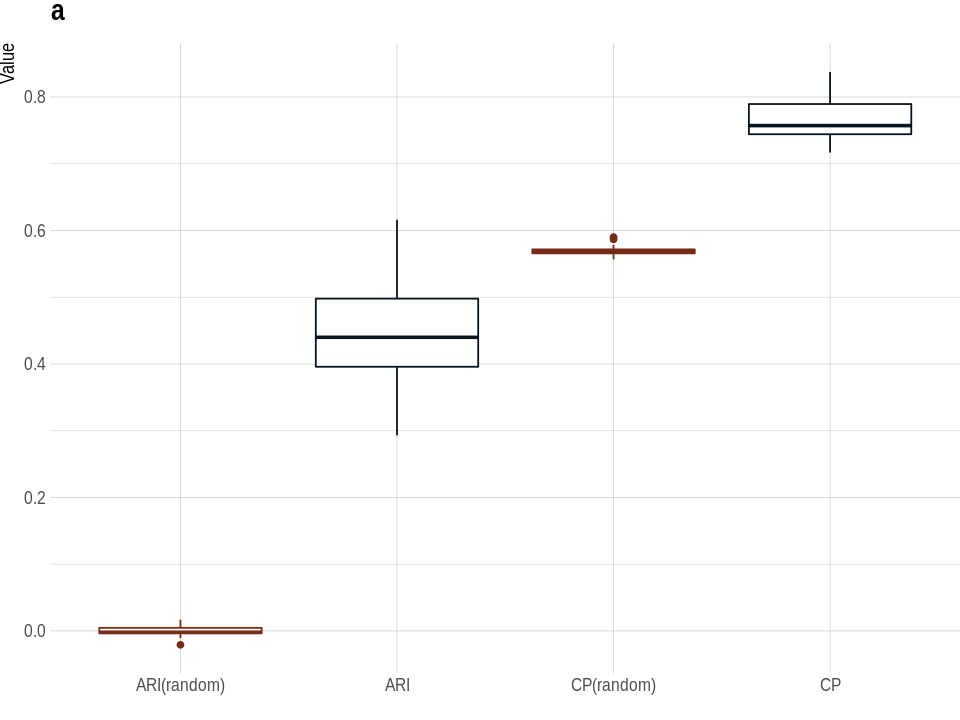

In [19]:
ari_between

## Consensus tree

test how robust are between-meter semantic associations without limiting number of forms per meter

1) batch build trees, random sampling from the same meters  
2) take trees and see how do they agree on clustering  
3) majority-rule consensus tree (at least 50% of times branches agree)  

In [24]:
source("src/consensus_tree_halo.R") # depends on poem_sampler.R

set.seed(123)

trees = consensus_tree_halo(x=unique_poems,
                    y=meter_count,
                    z=ru_gamma_separated,
                    sample_size = 300,
                    n_samples=100,
                    min_meter_count=350,
                    distance="JSD",
                    clust_method="complete")

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 19 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 19 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 19 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 19 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 19 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 19 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 19 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 19 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 19 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 19 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 19 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 19 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 19 vectors.

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 19 vectors.

Metric: 'jensen-shannon' using uni

In [25]:
# unrooted consesus
trans = translation  %>% rename(label = meter)

consensus = ape::consensus(trees, p=0.5)


plot=ggtree(consensus,layout="circular",size=0.5) 

# tinker with labels to extract classes
plot$data = plot$data  %>%
         mutate(class = str_replace_all(label, "^(.*?)\\d.*", "\\1"),
                class = str_replace_all(class,"Явольн", "Я"))  %>% 
         left_join(trans, by="label")  %>% 
         mutate(label = case_when(!is.na(label) ~ meter_eng))

cons_between = plot +geom_tiplab(aes(color=class),hjust=-.1,size=3) + guides(color=F) +
 scale_color_manual(values=c(rep(paletteer_d("ghibli::MononokeMedium"),2))) + labs(title="b") + xlim(0,4.5)

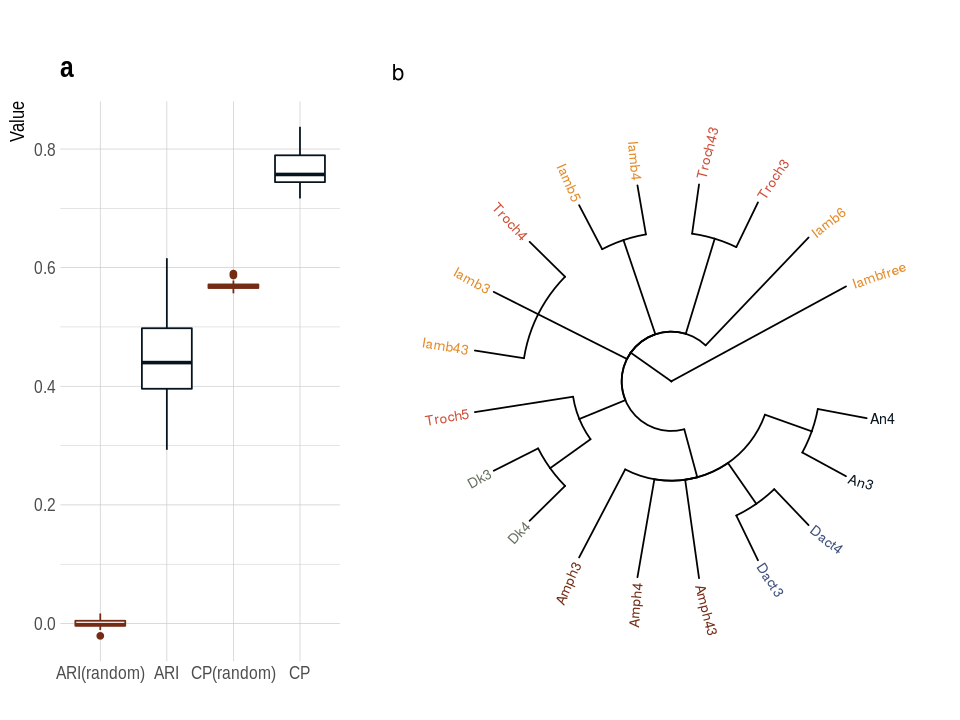

In [26]:
library(patchwork)

layout <- "
AABBBB
AABBBB"

ari_between + cons_between +theme(plot.margin =  margin(1, 0, 0, 1, "cm")) + plot_layout(design = layout)

ggsave("plots/fig3_between.png", width = 8, height = 4)

## Code backyard

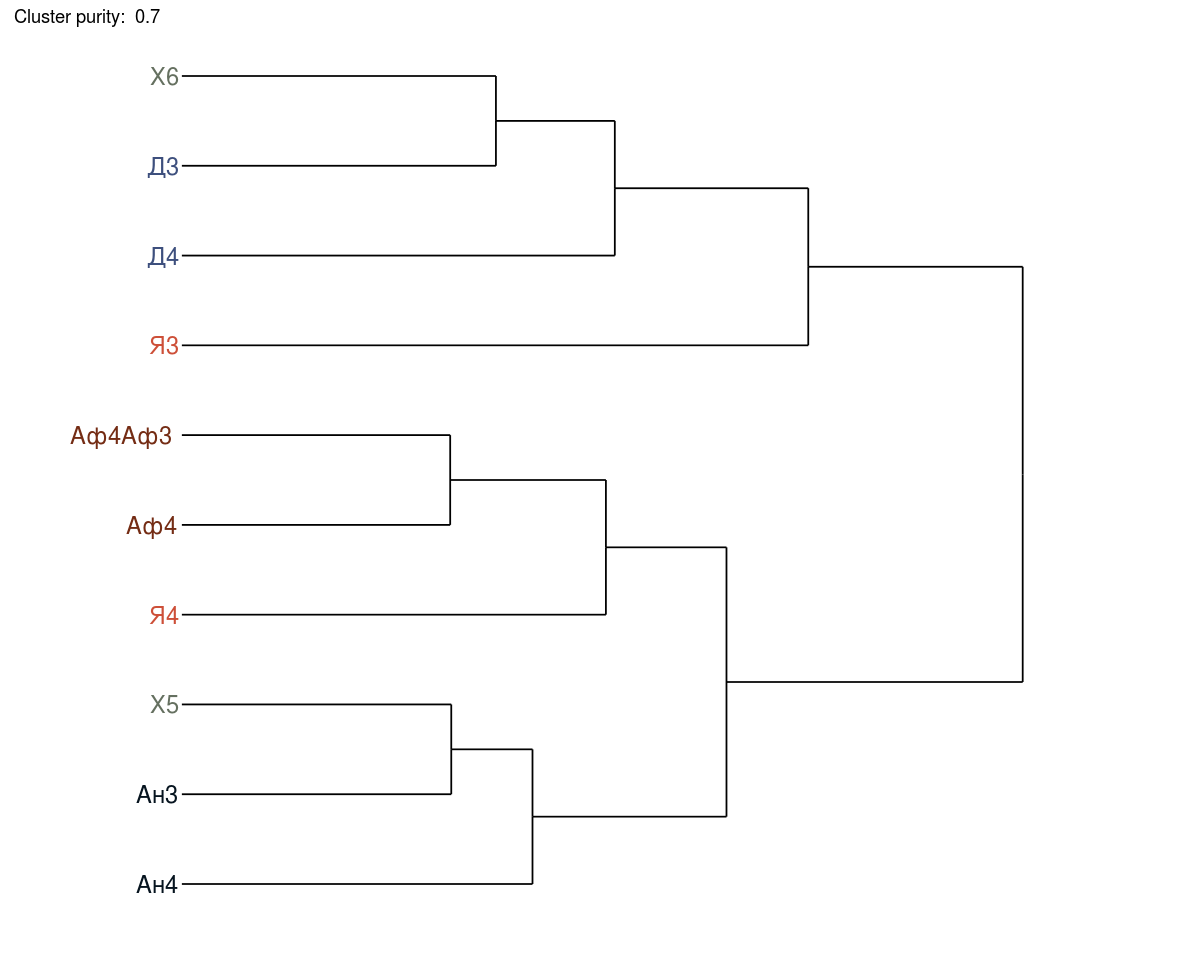

In [190]:
ggtree = tree  %>%
    as.dendrogram() %>%
    dendro_data()

ggtree$labels = ggtree$labels %>%
  mutate(m_family = str_replace(label, "^(.*?)\\d.*", "\\1"),
         m_family = str_replace(m_family, "Явольн", "Я"))

ggplot() +
  geom_segment(data=ggtree$segments,aes(x,y,xend=xend, yend=yend),size=0.5) + # map segments/branches
  geom_text(data=ggtree$labels, aes(x,y,label=label, color=m_family), hjust=1.1, angle=0, size=5) + # map labels
  coord_flip() +
  scale_y_continuous(expand=c(0.2, 0)) +
  theme_dendro() +
  scale_color_paletteer_d("ghibli::MononokeMedium") +
  guides(color=F) +
  labs(subtitle=paste("Cluster purity: ", round(purity,2)))